In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn import preprocessing
# from scipy.stats import chi2_contingency
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DATA/train_filtered.csv')

small_train = train[['click', 'C1', 'banner_pos', 'site_domain', 'app_id', 'device_id', 'device_ip','device_model', 'device_conn_type', 'C14', 'C20', 'site_id', 'C17', 'C19', 'C18', 'C21']]
small_train['C1516'] = (train['C15'] + train['C16'])/2

<ipython-input-3-adce6488cc8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_train['C1516'] = (train['C15'] + train['C16'])/2


### [돌리지 마세용] 일단 변수 선택

C1 -> 3이 너무 튀어 BINARY
banner_pos -> 7, 8이 너무 튀어
site_domain -> 얘도 약간 튀는데 괜찮을 듯
app_id -> 튀는 애 vs 나머지 BINARY
device_id -> 얘도 문제고
device_ip -> 마지막 친구 문제고.. (제일 튀는 애에 해당하는 데이터를 줄이는 것도 괜찮으려나?)
device_model -> 얜 괜찮고
device_conn_type -> 문제고
C14 -> 괜찮고
21 -> 얘도 괜찮아보이고

In [ ]:
small_train = train[['click', 'C1', 'banner_pos', 'site_domain', 'app_id', 'device_id', 'device_ip','device_model', 'device_conn_type', 'C14', 'C20', 'site_id', 'C17', 'C19', 'C18', 'C21']]
small_train.head()

,click,C1,banner_pos,site_domain,app_id,device_id,device_ip,device_model,device_conn_type,C14,C20,site_id,C17,C19,C18,C21
0,0,3,8,5423,9118,17727,143122,640967,641994,642307,644960,354,644671,644913,644858,645142
1,0,3,8,5423,8305,38297,216922,639832,641994,643361,645069,354,644698,644903,644857,645134
2,0,3,7,6296,7179,38297,636062,641272,641995,644161,644932,287,644853,644902,644859,645119
3,0,3,8,5423,10470,112390,523448,636202,641993,643678,644979,354,644780,644906,644860,645149
4,0,3,7,4621,7179,38297,636062,640811,641993,642139,644979,2495,644850,644906,644860,645119


In [ ]:
small_train['C19'].value_counts()
# len(small_train[small_train['app_id'] != '7179'])

,count
C18,
644858,4448314
644859,3468531
644860,2479926
644857,502059


(array([ 381848.,  471315.,  455128.,  209869.,  301026.,  396752.,
        4149539., 3618647.,  472713.,  441993.]),
 array([644861. , 644867.6, 644874.2, 644880.8, 644887.4, 644894. ,
        644900.6, 644907.2, 644913.8, 644920.4, 644927. ]),
 <BarContainer object of 10 artists>)

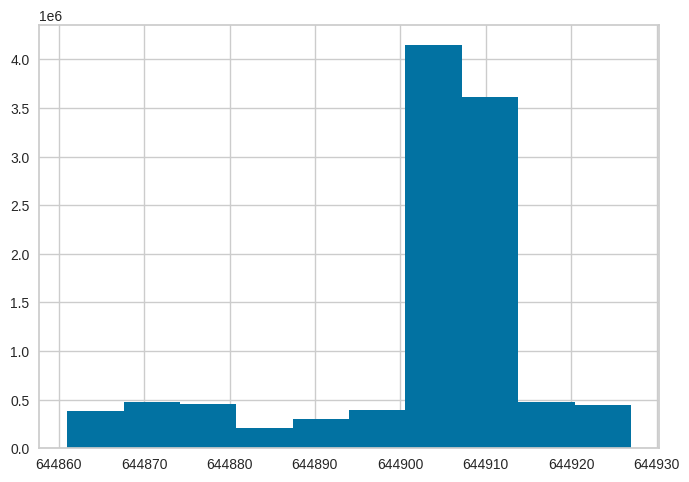

In [ ]:
plt.hist(small_train['C19'])

### [돌리지 마세용] BINARY

In [ ]:
# C1
small_train['C1_new'] = small_train['C1'].apply(lambda x: 1 if x != 3 else 0)
# small_train['C1_new'].value_counts()

# banner_pos
small_train['banner_pos_new'] = small_train['banner_pos'].apply(lambda x: 1 if x != 8 else 0)
# small_train['banner_pos_new'].value_counts()

# device_id
small_train['device_id_new'] = small_train['device_id'].apply(lambda x: 1 if x != 38297 else 0)
# small_train['device_id_new'].value_counts()

# app_id
small_train['app_id_new'] = small_train['app_id'].apply(lambda x: 1 if x != 7179 else 0)
# small_train['app_id_new'].value_counts()

# device_conn_type
small_train['device_conn_type_new'] = small_train['device_conn_type'].apply(lambda x: 1 if x != 641993 else 0)
# small_train['device_conn_type_new'].value_counts()


In [ ]:
small_train.head()

,click,C1,banner_pos,site_domain,app_id,device_id,device_ip,device_model,device_conn_type,C14,C21,C1_new,banner_pos_new,device_id_new,app_id_new,device_conn_type_new
0,0,3,8,5423,9118,17727,143122,640967,641994,642307,645142,0,0,1,1,1
1,0,3,8,5423,8305,38297,216922,639832,641994,643361,645134,0,0,0,1,1
2,0,3,7,6296,7179,38297,636062,641272,641995,644161,645119,0,1,0,0,1
3,0,3,8,5423,10470,112390,523448,636202,641993,643678,645149,0,0,1,1,0
4,0,3,7,4621,7179,38297,636062,640811,641993,642139,645119,0,1,0,0,0


In [ ]:
train_set = small_train.drop(columns = ['C1','banner_pos','app_id','device_id','device_conn_type'])
train_set.head()

train_set.to_csv('/content/drive/MyDrive/DATA/binary.csv', index = False)

In [ ]:
## 혹시라도 에러가 난다면

### RESAMPLE

In [ ]:
small_train.head()

,click,C1,banner_pos,site_domain,app_id,device_id,device_ip,device_model,device_conn_type,C14,C20,site_id,C17,C19,C18,C21,C1516
0,0,3,8,5423,9118,17727,143122,640967,641994,642307,644960,354,644671,644913,644858,645142,644422.0
1,0,3,8,5423,8305,38297,216922,639832,641994,643361,645069,354,644698,644903,644857,645134,644422.0
2,0,3,7,6296,7179,38297,636062,641272,641995,644161,644932,287,644853,644902,644859,645119,644422.0
3,0,3,8,5423,10470,112390,523448,636202,641993,643678,644979,354,644780,644906,644860,645149,644422.0
4,0,3,7,4621,7179,38297,636062,640811,641993,642139,644979,2495,644850,644906,644860,645119,644422.0


In [ ]:
small_train['C1'].value_counts()

,count
C1,
3,10004503
5,653185
4,200592
0,30698
2,6713
6,1749
1,1390


In [ ]:
train_under['device_ip'].value_counts()

,count
device_ip,
636062,41672
611209,845
257063,437
286521,310
496590,281
...,...
556131,1
280410,1
307167,1


In [ ]:
train_under.shape

(150105, 17)

In [ ]:
from sklearn.utils import resample

train_under = small_train.copy()

# C1
maj_c1 = train_under[train_under['C1'] == 3]
min_c1 = train_under[train_under['C1'] != 3]

train_under = resample(maj_c1, replace = False, n_samples = 5000000, random_state = 123)
train_under = pd.concat([train_under, min_c1])

# banner_pos
maj_banner_pos = train_under[train_under['banner_pos'] == 8]
min_banner_pos = train_under[train_under['banner_pos'] != 8]

train_under = resample(maj_banner_pos, replace = False, n_samples = 2000000, random_state = 123)
train_under = pd.concat([train_under, min_banner_pos])

# site_domain
maj_site_domain = train_under[train_under['site_domain'] == 5423]
min_site_domain = train_under[train_under['site_domain'] != 5423]

train_under = resample(maj_site_domain, replace = False, n_samples = 800000, random_state = 123)
train_under = pd.concat([train_under, min_site_domain])

# app_id
maj_app_id = train_under[train_under['app_id'] == 7179]
min_app_id = train_under[train_under['app_id'] != 7179]

train_under = resample(maj_app_id, replace = False, n_samples = 100000, random_state = 123)
train_under = pd.concat([train_under, min_app_id])

# device_id
maj_device_id = train_under[train_under['device_id'] == 38297]
min_device_id = train_under[train_under['device_id'] != 38297]

train_under = resample(maj_device_id, replace = False, n_samples = 30000, random_state = 123)
train_under = pd.concat([train_under, min_device_id])

maj_device_id = train_under[train_under['device_id'] == 112390]
min_device_id = train_under[train_under['device_id'] != 112390]

train_under = resample(maj_device_id, replace = False, n_samples = 25000, random_state = 123)
train_under = pd.concat([train_under, min_device_id])

device_ip
maj_device_ip = train_under[train_under['device_ip'] == 636062]
min_device_ip = train_under[train_under['device_ip'] != 636062]

train_under = resample(maj_device_ip, replace = False, n_samples = 10000, random_state = 123)
train_under = pd.concat([train_under, min_device_ip])

# device_conn_type
maj_device_conn_type = train_under[train_under['device_conn_type'] == 641993]
min_device_conn_type = train_under[train_under['device_conn_type'] != 641993]

train_under = resample(maj_device_conn_type, replace = False, n_samples = 100000, random_state = 123)
train_under = pd.concat([train_under, min_device_conn_type])

In [ ]:
train_under.shape
train_under.to_csv('/content/drive/MyDrive/DATA/undersampling_2.csv', index = False)

### pycaret

In [ ]:
import pandas as pd
### 원본
# undersampling = pd.read_csv('/content/drive/MyDrive/DATA/undersampling.csv')

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.6 MB/s eta 0:00:00
   ━━━

In [ ]:
from pycaret.classification import setup
from pycaret.classification import *

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DATA/undersampling_2.csv")

In [ ]:
categorical_columns = [col for col in df.columns.tolist() if col != 'click']

In [ ]:
exp1 = setup(data = df,
      target = 'click',
      fold = 5,
      fold_shuffle = True,
      session_id = 42,
      use_gpu = True,
      verbose = True,
      normalize = True,
      categorical_features = categorical_columns)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,42
1,Target,click
2,Target type,Binary
3,Original data shape,"(150105, 17)"
4,Transformed data shape,"(150105, 40)"
5,Transformed train set shape,"(105073, 40)"
6,Transformed test set shape,"(45032, 40)"
7,Categorical features,16
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
best_model = compare_models(sort='acc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7099,0.7604,0.5079,0.6434,0.5676,0.3539,0.3595,3.1180
lightgbm,Light Gradient Boosting Machine,0.7082,0.7581,0.4687,0.6549,0.5463,0.3398,0.3502,3.0640
gbc,Gradient Boosting Classifier,0.6916,0.7324,0.3688,0.6584,0.4728,0.2785,0.3019,25.0220
rf,Random Forest Classifier,0.6888,0.7362,0.5210,0.5975,0.5566,0.3186,0.3204,20.8680
ada,Ada Boost Classifier,0.6797,0.7098,0.3434,0.6349,0.4456,0.2476,0.2708,6.9640
et,Extra Trees Classifier,0.6792,0.7074,0.5023,0.5840,0.5400,0.2959,0.2979,20.9560
lr,Logistic Regression,0.6705,0.6637,0.2781,0.6393,0.3876,0.2074,0.2411,1.6420
ridge,Ridge Classifier,0.6704,0.6638,0.2757,0.6406,0.3855,0.2064,0.2407,1.1720
lda,Linear Discriminant Analysis,0.6704,0.6638,0.2773,0.6393,0.3868,0.2069,0.2406,1.5640
svm,SVM - Linear Kernel,0.6692,0.6277,0.2669,0.6412,0.3768,0.2008,0.2365,2.8580


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/DATA/avazu_test_data.csv')

In [ ]:
# C1516 변수 생성
test['C1516'] = (test['C15'] + test['C16'])/2

# test 데이터프레임으로 예측 수행
test_predictions = predict_model(best_model, data=test)

# 예측 결과 확인
test_predictions.head()

# 예측 결과에서 'id'와 'prediction_label' 컬럼만 선택
submission = test_predictions[['id', 'prediction_label']]

# 컬럼 이름을 'ID'와 'click'으로 변경
submission.columns = ['ID', 'click']

# submission.csv 파일로 저장
submission.to_csv("/content/drive/MyDrive/SUBMISSION/submission.csv", index=False)

# 결과 확인
submission.head()

### 일단 train 해보기..... > 실패 안 돌아가!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight = 'balanced')
model.fit(train_x, train_y)

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(train_x)
accuracy = accuracy_score(train_x, pred)
print('Accuracy:', accuracy)

### 더미변수로 라벨링

In [ ]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for col in train.columns:
  data_encoded[col] = label.fit_transform(train[col])

data_encoded.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,click
0,3,1,335,2234,15,2404,101,11,6224,28780,...,1,310,5,3,240,1,52,32,48,0
1,3,1,335,2234,15,1605,155,11,25044,97922,...,1,1357,5,3,267,0,42,141,40,0
2,3,0,268,3095,19,507,9,15,25044,490218,...,2,2157,5,3,422,2,41,4,25,0
3,3,1,335,2234,15,3729,53,11,93017,384825,...,0,1674,5,3,349,3,45,51,55,0
4,3,0,2449,1448,19,507,9,15,25044,490218,...,0,142,5,3,419,3,45,51,25,0


### 범주형 변수간 상관관계 분석

In [ ]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    phi2 = stat / obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(obs - 1)))
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df